### Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Градиентный бустинг


**Общая информация**

**Срок сдачи:** 10 мая 2021, 08:30   
**Штраф за опоздание:** -2 балла после 08:30 10 мая, -4 балла после 08:30 17 мая, -6 баллов после 08:30 24 мая, -8 баллов после 08:30 31 мая.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0221, Задание 4] Фамилия Имя. 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##  Считаем производные для функций потерь (1 балл)

Мы будем реализовать градиентный бустинг для 3 функций потерь:

1) MSE  $L(a(x_i), y_i) = (y_i - a(x_i)) ^ 2$

2) Экспоненциальная  $L(a(x_i), y_i) = exp( -a(x_i) y_i), y_i \in \{-1, 1\}$

3) Логистическая  $L(a(x_i), y_i) = \log (1 + exp( -a(x_i) y_i)), y_i \in \{-1, 1\}$

где $a(x_i)$ предсказание бустинга на итом объекте. 

Для каждой функции потерь напишите таргет, на который будет настраиваться каждое дерево в бустинге. 

Ваше решение тут

Ваше решение тут
переобозначим $$a(x{i}) = z$$
1) MSE: 
Тогда $$ -\frac{\partial }{\partial z}(y_i-z)^2 = 2(y_i - z)$$
2)Экспоненциальная:
    $$ -\frac{\partial }{\partial z}(exp(-z y_i) = y_i exp(-z y_i), y_i \in \{-1, 1\} $$
3)Логистическая:
    $$ - \frac{\partial }{\partial z} \log (1 + exp( -z y_i)) = \frac{y_i exp(-z y_i)}{1+exp(-z y_i)}, y_i \in \{-1, 1\}$$

##  Реализуем градиентный бустинг (3 балла)

Реализуйте класс градиентного бустинга для классификации. Ваша реализация бустинга должна работать по точности не более чем на 5 процентов хуже чем GradientBoostingClassifier из sklearn. 


Детали реализации:

-- должно поддерживаться 3 функции потерь

-- сами базовые алгоритмы(деревья, линейные модели и тп) реализовать не надо, просто возьмите готовые из sklearn

-- в качестве функции потерь для построения одного дерева используйте MSE

-- шаг в бустинге можно не подбирать, можно брать константный

-- можно брать разные модели в качестве инициализации бустинга

-- должны поддерживаться следующие параметры:

а) число итераций
б) размер шага
в) процент случайных фичей при построении одного дерева
д) процент случайных объектов при построении одного дерева
е) параметры базового алгоритма (передавайте через **kwargs)

In [16]:
import numpy as np

from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold

In [2]:
class MyGradientBoostingClassifier:

    def __init__(self, loss = 'mse', learning_rate = 0.1, n_estimators = 100, colsample = 0.8, subsample = 0.8, *args, **kwargs):
        """
        loss -- один из 3 лоссов:
        learning_rate -- шаг бустинга
        n_estimators -- число итераций
        colsample -- процент рандомных признаков при обучнеии одного алгоритма
        colsample -- процент рандомных объектов при обучнеии одного алгоритма
        args, kwargs -- параметры  базовых моделей
        """
        self.my_loss = loss
        self.my_learning_rate = learning_rate
        self.my_n_estimators = n_estimators
        self.my_colsample = colsample
        self.my_subsample = subsample
        self.my_args = args
        self.my_kwargs = kwargs
        self.algorithms = []
        self.features_index = []
        pass
    
    def data(self):
        features_inds = np.random.randint(
            0, self.X.shape[1], size=int(self.X.shape[1] * self.my_colsample))
        self.features_index.append(features_inds)
        objects_inds = np.random.randint(
            0, self.X.shape[0], size=int(self.X.shape[0] * self.my_subsample))
        X_for_fit = self.X[np.ix_(objects_inds, features_inds)]
        X_pred = self.X[:, features_inds]
        y_for_fit = self.y[objects_inds]
        prev_res = self.prediction[objects_inds]
        return X_for_fit, X_pred, y_for_fit, prev_res
    def gradient(self,now,preds):
        if (self.my_loss == 'mse'):
             return now - preds
        elif self.my_loss == 'log':
            return now * np.exp(-preds * now) / (1 + np.exp(-preds * now))
        else:
             return now * np.exp(-preds * now)
    def fit(self, X, y, base_model = DecisionTreeRegressor, init_model=None):
        """
        X -- объекты для обучения
        y -- таргеты для обучения
        base_model -- класс базовых моделей, например sklearn.tree.DecisionTreeRegressor
        init_model -- класс для первой модели, если None то берем константу (только для посл задания)
        """
        self.X = X
        self.y = y
        self.prediction = np.zeros(y.shape[0])
        for i in range(self.my_n_estimators):
            X_fit, X_pred, y_grad, prev_res = self.data()
            target = self.gradient(y_grad, prev_res)
            algorithm = base_model(*self.my_args, **self.my_kwargs)
            algorithm.fit(X_fit,target)
            predict = algorithm.predict(X_pred).reshape([X.shape[0]])
            self.algorithms.append(algorithm)
            self.prediction +=  self.my_learning_rate * predict
        return self
        
    def predict(self, X):
        prediction = np.zeros(X.shape[0])
        for i in range(self.my_n_estimators):
            prediction += self.my_learning_rate * self.algorithms[i].predict(X[:,self.features_index[i]]).reshape([X.shape[0]])
        for i in range(len(prediction)):
            prediction[i] =int(prediction[i] + 0.5)
        return prediction


In [3]:
my_clf = MyGradientBoostingClassifier()
clf = GradientBoostingClassifier()

In [4]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, stratify=wine.target)

In [5]:
my_clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))
print(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

0.8888888888888888
0.9444444444444444


## Подбираем параметры (2 балла)

Давайте попробуем применить Ваш бустинг для предсказаний цены домов в Калифорнии. Чтобы можно было попробовтаь разные функции потерь, переведем по порогу таргет в 2 класса: дорогие и дешевые дома.

В задании нужно

1) Построить график точности в зависимости от числа итераций на валидации.

2) Подобрать оптимальные параметры Вашего бустинга на валидации. 


In [6]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [7]:
# Превращаем регрессию в классификацию
y = (y > 2.0).astype(int)
print(X.shape, y.shape)

(20640, 8) (20640,)


In [8]:
kf = KFold(n_splits=5, shuffle=False)
full_res = []
estimators = np.arange(20, 161, 10)
for n in estimators:
    res = []
    for train_index, val_index in kf.split(X):
        model = MyGradientBoostingClassifier(n_estimators = n)
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(X_train, y_train)
        res.append(accuracy_score(y_val, model.predict(X_val)))
    print(n,':',np.mean(res))
    full_res.append(np.mean(res))

20 : 0.802422480620155
30 : 0.8099806201550388
40 : 0.8041182170542636
50 : 0.8011627906976745
60 : 0.8175872093023255
70 : 0.7919573643410853
80 : 0.8034883720930234
90 : 0.8005813953488372
100 : 0.8045542635658915
110 : 0.8041182170542636
120 : 0.8133236434108527
130 : 0.8060077519379846
140 : 0.7969476744186046
150 : 0.7931201550387597
160 : 0.8094961240310077


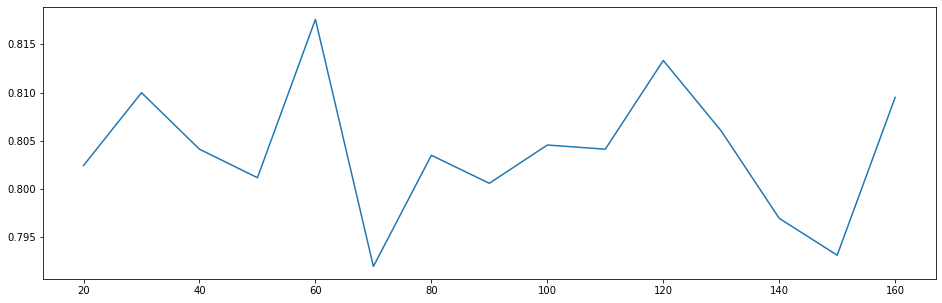

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 5))
plt.plot(estimators, full_res)
plt.show()

In [18]:
metrics = ['mse', 'log', 'exp']
learning_rates = [0.09, 0.1, 0.11]
n_estimators = [90, 100, 110]
kf = KFold(n_splits=5, shuffle=False)
result = []
max_res = 0 
max_metric = ''
max_learning_rate = 0
max_n_estimators = 0
for metric in metrics:
    for rate in learning_rates:
        for estimators in n_estimators:
            res = []
            for train_index, val_index in kf.split(X):
                model = MyGradientBoostingClassifier(loss = metric, learning_rate = rate, n_estimators = estimators)
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]
                model.fit(X_train, y_train)
                res.append(accuracy_score(y_val, model.predict(X_val)))
            if (np.mean(res) > max_res):
                max_res = np.mean(res)
                max_metric = metric
                max_learning_rate = rate
                max_n_estimators = estimators
        print(n,':',np.mean(res))

160 : 0.8151647286821706
160 : 0.7939437984496124
160 : 0.7977713178294573
160 : 0.4466085271317829
160 : 0.4108042635658914
160 : 0.38890503875968996
160 : 0.3638565891472868
160 : 0.3471899224806202
160 : 0.3050872093023256


In [19]:
print(max_res,' ',max_metric,' ',max_learning_rate,' ',max_n_estimators)

0.8151647286821706   mse   0.09   110


## BooBag BagBoo (1 балл)



Попробуем объединить бустинг и бэгинг. Давайте

1) в качестве базовой модели брать не дерево решений, а случайный лес (из sklearn)

2) обучать N бустингов на бустрапированной выборке, а затем предикт усреднять

Попробуйте обе этих стратегии на данных из прошлого задания. Получилось ли улучшить качество? Почему?

In [10]:
my_clf = MyGradientBoostingClassifier(n_estimators = 120)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
my_clf.fit(X_train,y_train,RandomForestRegressor)
accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test)

0.8940105695830887

In [11]:
my_clf = MyGradientBoostingClassifier(n_estimators = 120)
my_clf.fit(X_train,y_train)
accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test)

0.8834409864944216

In [13]:
def data(X,y):
        objects_inds = np.random.randint(
            0, X.shape[0], size=int(X.shape[0] * 0.8))
        X_for_fit = X[objects_inds]
        y_for_fit = y[objects_inds]
        return X_for_fit, y_for_fit
N = 10
res = []
for i in range(N):
    X_fit, y_fit = data(X_train, y_train)
    my_clf = MyGradientBoostingClassifier(n_estimators = 120)
    my_clf.fit(X_fit, y_fit)
    res.append(my_clf)
result = []
for i in range(N):
    result.append(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))


In [15]:
result = np.asarray(result)
result.mean()

0.8866705813270699

## Умная инициализация (1 балл)

Попробуйте брать в качестве инициализации бустинга не константу, а какой-то алгоритм и уже от его предикта стартовать итерации бустинга. Попробуйте разные модели из sklearn: линейные модели, рандом форест, svm..

Получилось ли улучшить качество? Почему?



NameError: name 'RandomForestRegressor' is not defined

## Фидбек (бесценно)

* Какие аспекты обучения  ансамблей Вам показались непонятными? Какое место стоит дополнительно объяснить?

### Ваш ответ здесь

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.

### ВАШ ОТЗЫВ ЗДЕСЬ

